In [3]:
from itertools import groupby
from operator import itemgetter

import pandas as pd
import pickle
from sklearn.decomposition import PCA

import logging
logging.basicConfig(
    format="%(asctime)s %(module)s (%(lineno)s) %(levelname)s %(message)s",
    level=logging.DEBUG)

from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


In [4]:
names = ['verb', 'args', 'mazsola1', 'mazsola_.5m', 'tade', 'prev', 'prev_inf', 'MetaMorpho', 
         'sum_rel_freq']
manocska = pd.read_csv('/home/makrai/repo/manocska/manocska.sorted.txt', sep='\t', names=names, index_col=[0,1], 
                       na_values='None')

1. verb lemma (the verbal particle is separated by pipe, |)
2. arguments, separated by space
3. frequency based on the Hungarian verbal structures (dictionary)
4. frequency based on the 500000 verbal structures (list)
5. frequency based on Tádé
6. frequency based on Ágnes Kalivoda's MA thesis (in the case no particle, this field in None)
7. frequency based on Ágnes Kalivoda's collection _Infinitival constructions in Hungarian_; 
    in case of no infinitival argument, this field is None
8. frequency based on MetaMorpho
9. sum of the relative frequencies of the freame in each resource

In [5]:
manocska = manocska.fillna(0)

In [6]:
manocska.head()

,,mazsola1,mazsola_.5m,tade,prev,prev_inf,MetaMorpho,sum_rel_freq
verb,args,,,,,,,
kell,INF,0,0,365197,0.0,1512519.0,0,0.219617
tud,INF,0,0,85760,0.0,1388057.0,0,0.173420
lehet,INF,0,0,110822,0.0,1139548.0,0,0.146930
fog,INF,0,0,47494,0.0,840888.0,0,0.104555
akar,INF,0,0,27731,0.0,612623.0,0,0.075398


# Visualization
## Only Mazsola (two versions) and Tádé

In [7]:
def scatter(mncs3):
    plt.scatter(mncs3[:,0], mncs3[:,1], c=mncs3[:,2], s=.1)

2018-10-09 15:31:21,297 <ipython-input-9-fce746f4c71d> (3) INFO [[ 0.15664163  0.97740439  0.1419298 ]
 [ 0.1960217  -0.17161125  0.96546625]
 [ 0.96800769 -0.12341088 -0.21847394]]


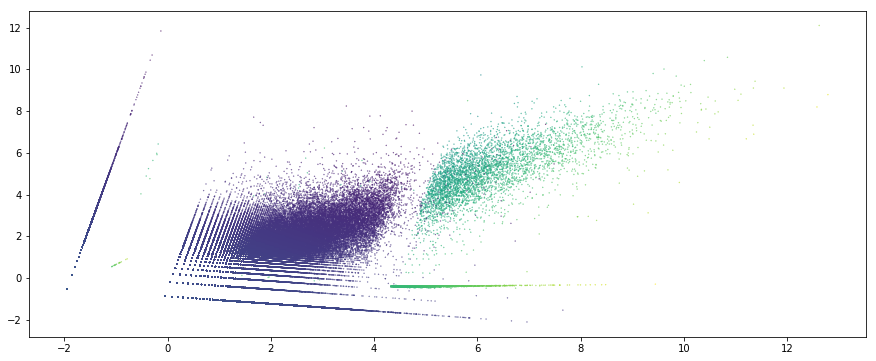

In [9]:
pca = PCA(n_components=3)
mncs3 = pca.fit_transform(np.log(manocska.values[:500000,:3] + 1))#[['mazsola1', 'mazsola_.5m', 'tade']])
logging.info(pca.components_)
scatter(mncs3)

## All resources (but not `rank`)

2018-10-09 15:31:36,370 <ipython-input-10-9354057a7087> (3) INFO 
[[ 0.01760699  0.16695943  0.04376072 -0.98479263  0.00137555  0.00900681]
 [ 0.16320183  0.96660844  0.09828583  0.17112256 -0.00904067 -0.0029176 ]
 [ 0.20670389 -0.13736736  0.96819149  0.02361058  0.01118295  0.01806755]]


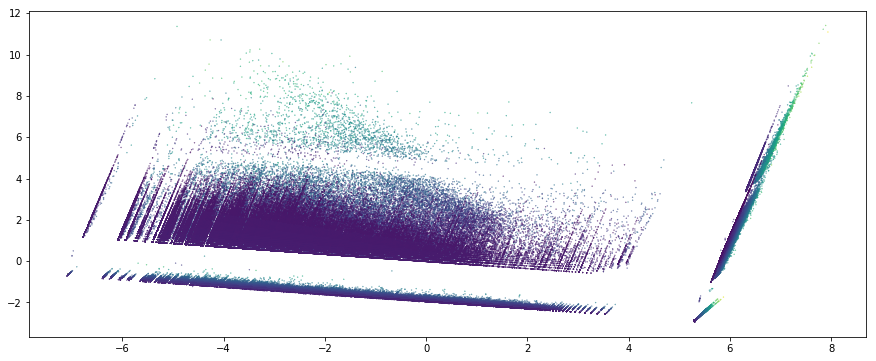

In [10]:
pca = PCA(n_components=3)
mncs3 = pca.fit_transform(np.log(manocska.values[:500000,:-1] + 1))#[['mazsola1', 'mazsola_.5m', 'tade']])
logging.info('\n{}'.format(pca.components_))
scatter(mncs3)